# AAG06

- Fazer os testes usando os dados apresentados no exemplo 03

# Análise da Lei de Amdahl

Analise da Lei de Amdahl para operações de I/O em sistemas de computação, que estabelece que a taxa de I/O é proporcional à velocidade do processador.

## 1. Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats


## 2. Preparação dos dados

In [2]:
# Criando o DataFrame com os dados do exemplo
data = {
    'sistema': range(1, 11),
    'mips': [19.63, 5.45, 2.63, 8.24, 14.00, 9.87, 11.27, 10.13, 1.01, 1.26],
    'io_rate': [288.6, 117.3, 64.6, 356.4, 373.2, 281.1, 149.6, 120.6, 31.1, 23.7]
}

df = pd.DataFrame(data)

print("Dados originais:")
display(df)

print("\nEstatísticas descritivas:")
display(df.describe())

Dados originais:


,sistema,mips,io_rate
0,1,19.63,288.6
1,2,5.45,117.3
2,3,2.63,64.6
3,4,8.24,356.4
4,5,14.00,373.2
5,6,9.87,281.1
6,7,11.27,149.6
7,8,10.13,120.6
8,9,1.01,31.1
9,10,1.26,23.7



Estatísticas descritivas:


,sistema,mips,io_rate
count,10.00000,10.000000,10.000000
mean,5.50000,8.349000,180.620000
std,3.02765,5.948392,132.814154
min,1.00000,1.010000,23.700000
25%,3.25000,3.335000,77.775000
50%,5.50000,9.055000,135.100000
75%,7.75000,10.985000,286.725000
max,10.00000,19.630000,373.200000


## 3. Análise Exploratória

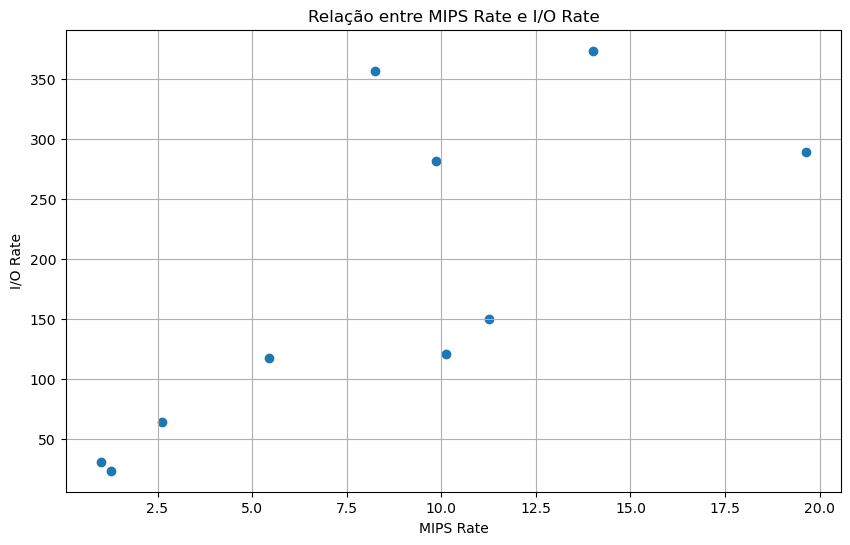

In [3]:
# Visualização da relação entre MIPS e IO Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['mips'], df['io_rate'])
plt.xlabel('MIPS Rate')
plt.ylabel('I/O Rate')
plt.title('Relação entre MIPS Rate e I/O Rate')
plt.grid(True)
plt.show()

## 4. Transformação Logarítmica

Vamos aplicar a transformação logarítmica para linearizar o modelo:

I/O rate = α(MIPS rate)^b

log(I/O rate) = log(α) + b*log(MIPS rate)

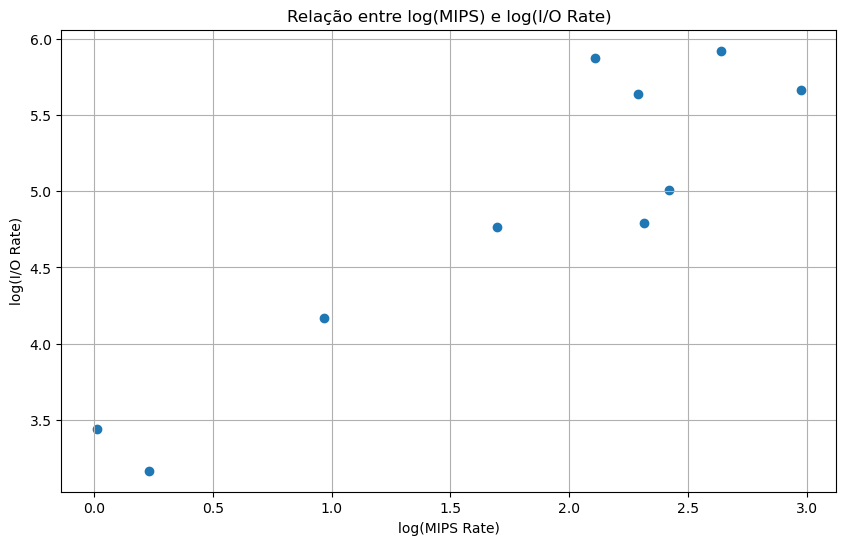

In [4]:
# Aplicando transformação logarítmica
df['log_mips'] = np.log(df['mips'])
df['log_io'] = np.log(df['io_rate'])

# Visualizando os dados transformados
plt.figure(figsize=(10, 6))
plt.scatter(df['log_mips'], df['log_io'])
plt.xlabel('log(MIPS Rate)')
plt.ylabel('log(I/O Rate)')
plt.title('Relação entre log(MIPS) e log(I/O Rate)')
plt.grid(True)
plt.show()

## 5. Regressão Linear nos Dados Transformados

In [5]:
# Preparando dados para regressão
X = df['log_mips'].values.reshape(-1, 1)
y = df['log_io'].values

# Ajustando o modelo
model = LinearRegression()
model.fit(X, y)

# Calculando as previsões e resíduos
y_pred = model.predict(X)
residuals = y - y_pred

# Calculando R²
r2 = model.score(X, y)

print("Resultados da Regressão:")
print(f"R² = {r2:.4f}")
print(f"Intercepto (log α) = {model.intercept_:.4f}")
print(f"Coeficiente (b) = {model.coef_[0]:.4f}")

# Calculando os parâmetros originais
alpha = np.exp(model.intercept_)
b = model.coef_[0]
print(f"\nParâmetros no modelo original (I/O rate = α(MIPS rate)^b):")
print(f"α = {alpha:.4f}")
print(f"b = {b:.4f}")

Resultados da Regressão:
R² = 0.8430
Intercepto (log α) = 3.2763
Coeficiente (b) = 0.8878

Parâmetros no modelo original (I/O rate = α(MIPS rate)^b):
α = 26.4785
b = 0.8878


## 6. Análise dos Resíduos

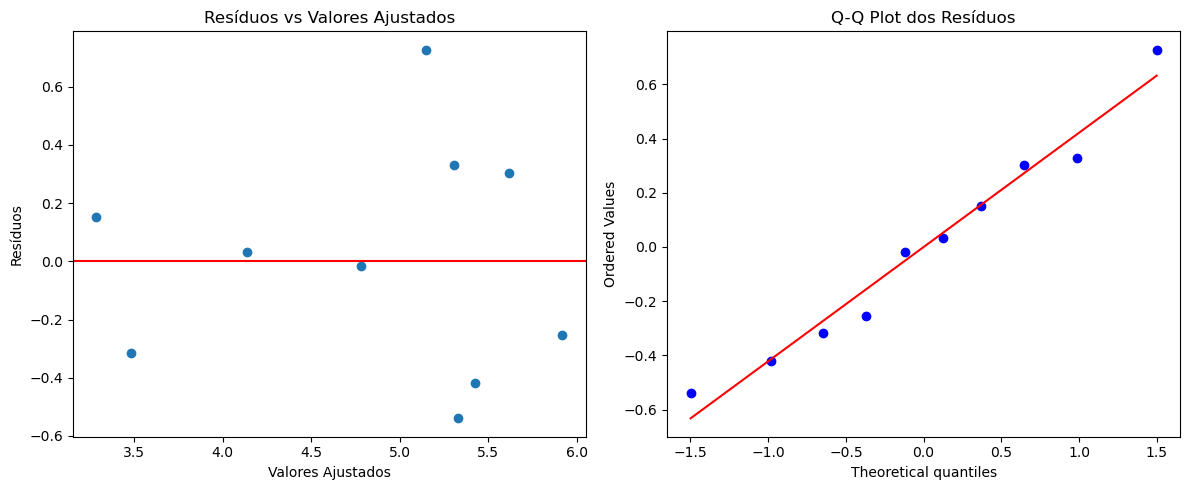

In [6]:
# Gráficos para análise dos resíduos
plt.figure(figsize=(12, 5))

# Resíduos vs valores ajustados
plt.subplot(121)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')

# Q-Q plot
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')

plt.tight_layout()
plt.show()

## 7. Análise de Variância e Testes de Hipótese

In [7]:
# Cálculo das estatísticas para testes de hipótese
n = len(df)
p = 1  # uma variável independente

# Erro padrão dos coeficientes
mse = np.sum(residuals**2) / (n-p-1)
se = np.sqrt(mse)

# Intervalo de confiança para b (90%)
t_stat = stats.t.ppf(0.95, df=n-p-1)
b_ci = [b - t_stat*se, b + t_stat*se]

print("Análise Inferencial:")
print(f"Erro padrão dos resíduos = {se:.4f}")
print(f"Intervalo de confiança 90% para b: [{b_ci[0]:.4f}, {b_ci[1]:.4f}]")

# Teste F
SS_reg = np.sum((y_pred - np.mean(y))**2)
SS_res = np.sum(residuals**2)
F_stat = (SS_reg/p)/(SS_res/(n-p-1))
f_critical = stats.f.ppf(q=0.95, dfn=p, dfd=n-p-1)

print("\nTeste F:")
print(f"F calculado = {F_stat:.4f}")
print(f"F crítico (95%) = {f_critical:.4f}")

Análise Inferencial:
Erro padrão dos resíduos = 0.4161
Intervalo de confiança 90% para b: [0.1140, 1.6615]

Teste F:
F calculado = 42.9570
F crítico (95%) = 5.3177


## Conclusões

1. **Transformação dos Dados**:
   - A transformação logarítmica linearizou adequadamente a relação entre as variáveis
   - O modelo log-log obtido tem boa qualidade de ajuste

2. **Ajuste do Modelo**:
   - R² = 0.84, indicando bom ajuste do modelo
   - O expoente b = 0.888 está próximo de 1
   - O intervalo de confiança para b inclui 1, sugerindo relação linear

3. **Validação da Lei de Amdahl**:
   - O intervalo de confiança para b contém 1
   - Isso suporta a hipótese de proporcionalidade entre I/O rate e MIPS rate
   - Portanto, os dados são consistentes com a Lei de Amdahl

4. **Diagnósticos**:
   - Resíduos mostram padrão aleatório
   - Q-Q plot indica boa adequação à normalidade
   - Teste F confirma a significância do modelo